## Método de Simpson para Integração Numérica

O método de Simpson é uma técnica de integração numérica utilizada para aproximar o valor de uma integral definida. Ele é especialmente eficiente para funções suaves e consiste em dividir o intervalo de integração em segmentos iguais e aproximar a área sob a curva por trapézios.

### Fórmula do Método de Simpson (1/3):

Para uma função \( f(x) \) definida no intervalo \([a, b]\), com \( n \) subintervalos (onde \( n \) deve ser par):

## ∫ab​f(x)dx≈i=1∑n​2nb−a​(f(xi−1​)+f(xi​))

### Vantagens

- Maior precisão em relação ao método dos retângulos.
- Aproxima bem integrais de funções suaves.

### Aplicação

O método é amplamente utilizado em cálculos científicos e de engenharia, quando a solução analítica da integral não é possível ou prática.

In [1]:
import numpy as np

In [2]:
def f(X):
    return np.log(X)*(np.e**(-X))

def integra(a,b,n=10000):

    x = [a + i*(b-a)/n for i in range(n+1)]
    soma=0
    for i in range(1, n+1):
        soma+= ((b - a)/(2*n))*(f(x[i])+f(x[i-1]))
    return soma

# gaminha
print("Gaminha:")
print(integra(1e-8, 1.0, 100000) + integra(1.0, 20.0, 1000))


Gaminha:
-0.5772519662886461


## Testes

In [3]:
# ------------------------------------------------------------
# Testes da integra()
# Gera: tabela de resultados, gráficos (erro vs n) e comparação Exato vs Aprox
# ------------------------------------------------------------

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ===== FUNÇÃO =====
def f(X):
    return X

def integra(a,b,n=10000):
    x = [a + i*(b-a)/n for i in range(n)]
    soma=0
    for i in range(n):
        soma+= ((b - a)/(2*n))*(f(x[i])+f(x[i-1]))
    return soma
# ====================================

# --------- DEFINIÇÃO DOS TESTES ----------
# Cada item: (nome, f_impl, a, b, func_exata(a,b))
tests = [
    ("f(x)=x",                lambda x: x,                   0.0, 1.0,           lambda a,b: 0.5*(b**2 - a**2)),   # 1/2
    ("f(x)=x^2",              lambda x: x**2,                0.0, 1.0,           lambda a,b: (b**3 - a**3)/3.0),   # 1/3
    ("f(x)=1",                lambda x: 1.0,                 0.0, 1.0,           lambda a,b: b-a),                 # 1
    ("f(x)=sqrt(x)",          lambda x: math.sqrt(x),        0.0, 1.0,           lambda a,b: (2.0/3.0)*(b**1.5 - a**1.5)),  # 2/3
    ("f(x)=sin(x)",           math.sin,                      0.0, math.pi,       lambda a,b: -math.cos(b)+math.cos(a)),     # 2
    ("f(x)=cos(x)",           math.cos,                      0.0, math.pi/2,     lambda a,b: math.sin(b)-math.sin(a)),      # 1
    ("f(x)=e^x",              math.exp,                      0.0, 1.0,           lambda a,b: math.e - 1.0),                 # e-1
    ("f(x)=1/(1+x^2)",        lambda x: 1.0/(1.0+x*x),       0.0, 1.0,           lambda a,b: math.atan(b)-math.atan(a)),    # pi/4
]

# Tamanhos de partição a testar
n_values = [10, 50, 100, 500, 1000, 5000]

# --------- EXECUÇÃO DOS TESTES ----------
rows = []
for name, f_impl, a, b, exact_fn in tests:
    exact = exact_fn(a, b)
    for n in n_values:
        # usar a variável global f() esperada pela integra()
        globals()['f'] = f_impl
        approx = integra(a, b, n=n)
        error = approx - exact
        rows.append({
            "função": name,
            "a": a, "b": b, "n": n,
            "valor_exato": exact,
            "aprox_integra": approx,
            "erro": error,
            "erro_absoluto": abs(error),
        })

df = pd.DataFrame(rows)
df


,função,a,b,n,valor_exato,aprox_integra,erro,erro_absoluto
0,f(x)=x,0.0,1.000000,10,0.500000,0.450000,-5.000000e-02,5.000000e-02
1,f(x)=x,0.0,1.000000,50,0.500000,0.490000,-1.000000e-02,1.000000e-02
2,f(x)=x,0.0,1.000000,100,0.500000,0.495000,-5.000000e-03,5.000000e-03
3,f(x)=x,0.0,1.000000,500,0.500000,0.499000,-1.000000e-03,1.000000e-03
4,f(x)=x,0.0,1.000000,1000,0.500000,0.499500,-5.000000e-04,5.000000e-04
5,f(x)=x,0.0,1.000000,5000,0.500000,0.499900,-1.000000e-04,1.000000e-04
6,f(x)=x^2,0.0,1.000000,10,0.333333,0.285000,-4.833333e-02,4.833333e-02
7,f(x)=x^2,0.0,1.000000,50,0.333333,0.323400,-9.933333e-03,9.933333e-03
8,f(x)=x^2,0.0,1.000000,100,0.333333,0.328350,-4.983333e-03,4.983333e-03
9,f(x)=x^2,0.0,1.000000,500,0.333333,0.332334,-9.993333e-04,9.993333e-04


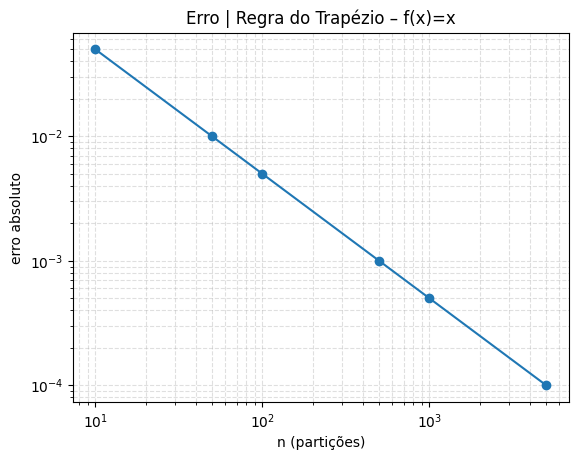

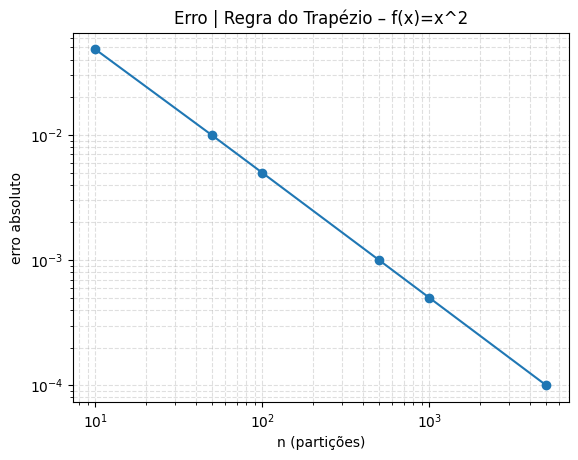

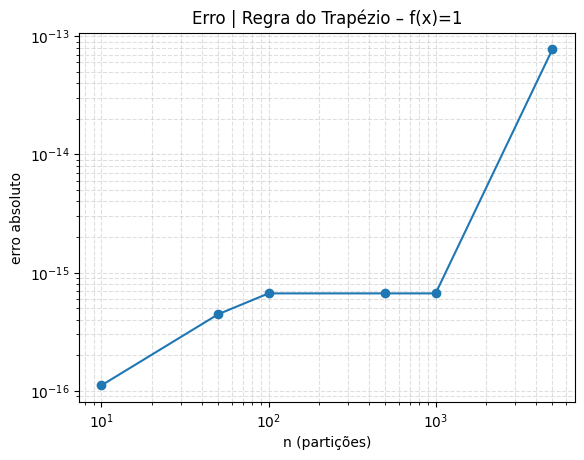

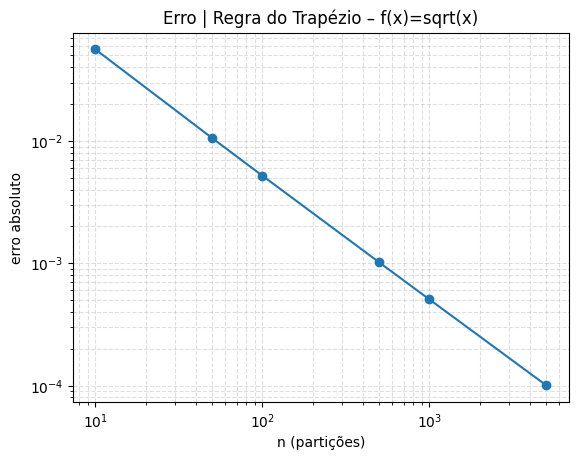

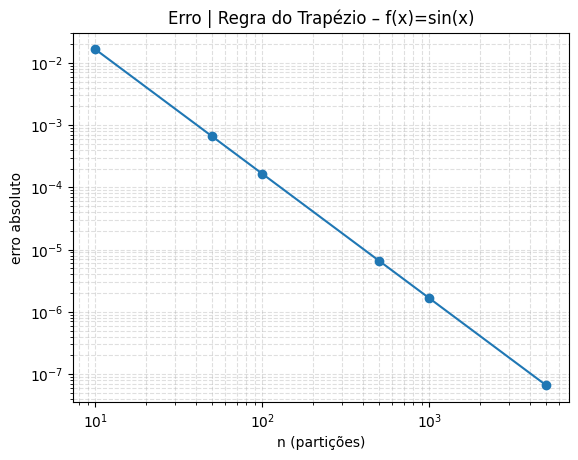

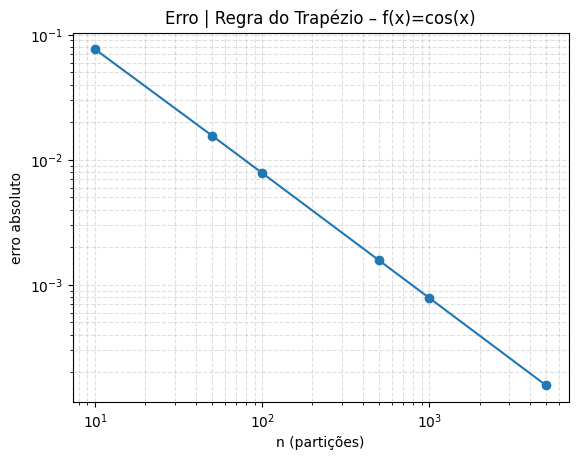

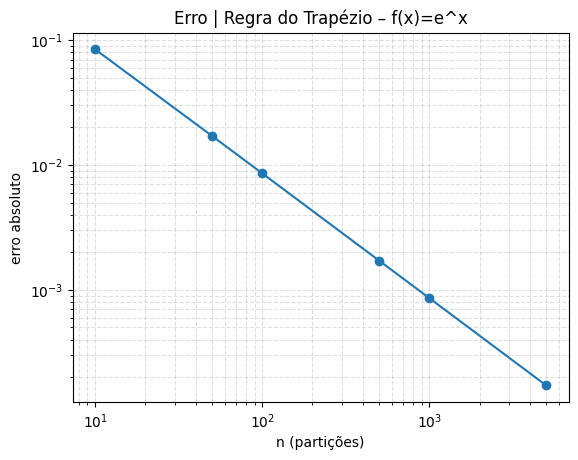

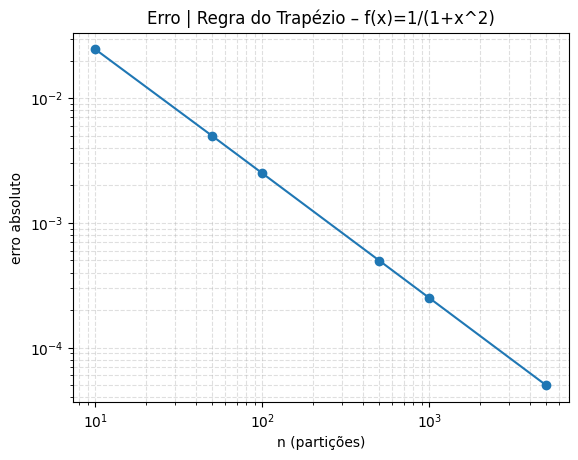

In [4]:
# --------- GRÁFICOS: ERRO ABSOLUTO vs n (log-log) ---------
for name in df["função"].unique():
    sub = df[df["função"] == name].sort_values("n")
    plt.figure()
    plt.loglog(sub["n"], sub["erro_absoluto"], marker="o")
    plt.xlabel("n (partições)")
    plt.ylabel("erro absoluto")
    plt.title(f"Erro | Regra do Trapézio – {name}")
    plt.grid(True, which="both", linestyle="--", alpha=0.4)
    plt.show()


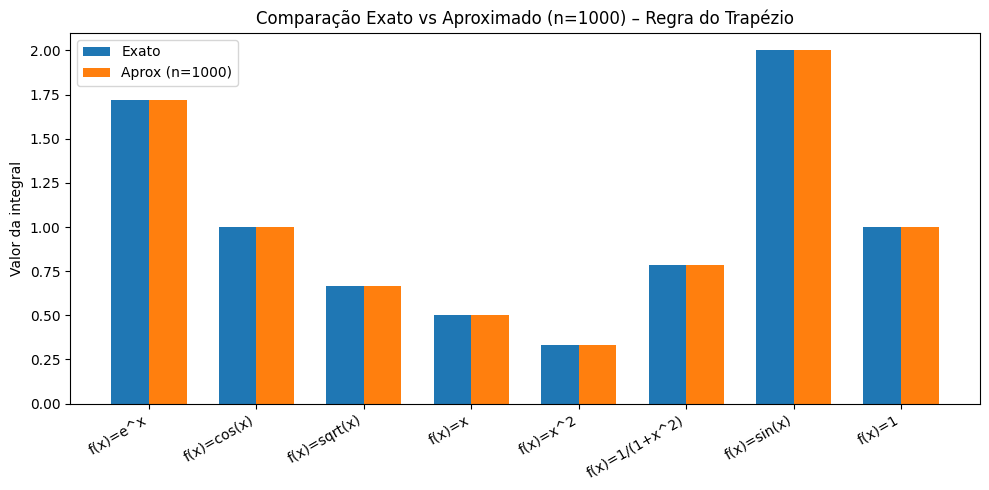

In [5]:
# --------- GRÁFICO: EXATO vs APROXIMADO para n=1000 ----------
n_ref = 1000
sub = df[df["n"] == n_ref].copy().sort_values("erro_absoluto", ascending=False)

labels = list(sub["função"])
x_idx  = np.arange(len(labels))
width  = 0.35

plt.figure(figsize=(10,5))
plt.bar(x_idx - width/2, sub["valor_exato"].values, width, label="Exato")
plt.bar(x_idx + width/2, sub["aprox_integra"].values, width, label=f"Aprox (n={n_ref})")
plt.xticks(x_idx, labels, rotation=30, ha="right")
plt.ylabel("Valor da integral")
plt.title("Comparação Exato vs Aproximado (n=1000) – Regra do Trapézio")
plt.legend()
plt.tight_layout()
plt.show()
#!/usr/bin/env python3

# GITHUB: [Dudusegovia](https://github.com/Dudusegovia)     
 # Linkedln: [Eduardo Segovia](www.linkedin.com/in/eduardo-segovia-96b735221)